In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [2]:
# Usa el qasm_simulator Aer
simulator = QasmSimulator()

# Crea un circuito cuantico actuando sobre el q registrador
circuit = QuantumCircuit(2,2)

# Aplica una compuerta H sobre el qubit 0
circuit.h(0)

# Aplica una compuerta CX (CNOT) con el qubit 0 como qubit de control y el qubit 1 como
# qubit target
circuit.cx(0,1)

# Mapea la medida cuantica en bit clasicos
circuit.measure([0, 1], [1, 0])
# compilar el circuito hasta instrucciones QASM de bajo nivel admitidas por el backend 
# (no es necesario para circuitos simples)
compiled_circuit = transpile(circuit, simulator)

# Ejecuta el circuito en el simulador qasm
job = simulator.run(compiled_circuit, shots=1000)

# Obtiene los resultados del trabajo
result = job.result()

# Devuelve las cuentas
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Dibuja el circuito
circuit.draw()



Total count for 00 and 11 are: {'00': 508, '11': 492}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                1  0

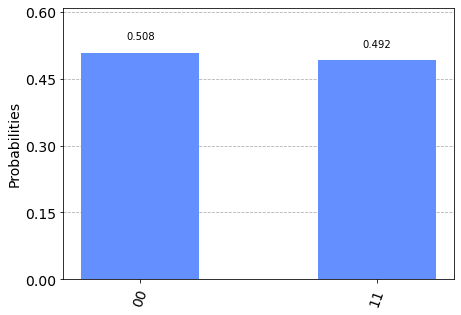

In [3]:
# Grafica un histograma
plot_histogram(counts)